# MNISTの分析
### 必要なライブラリのインストールとインポート
環境はPython 3.8.19

/opt/anaconda3/envs/mnist_env/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/opt/anaconda3/envs/mnist_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_res

Accuracy: 0.9202857142857143


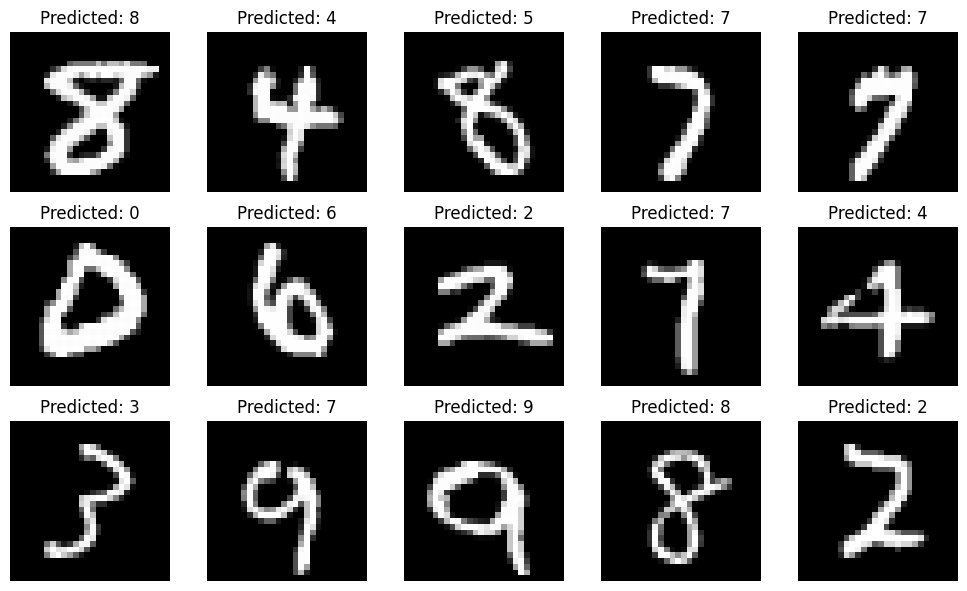

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# MNISTデータをダウンロードして読み込む
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

# データを正規化する（0から1の範囲にスケーリング）
X = X / 255.0

# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ロジスティック回帰モデルを定義する
log_reg = LogisticRegression(max_iter=100)

# モデルを訓練する
log_reg.fit(X_train, y_train)

# テストデータを使って予測を行う
y_pred = log_reg.predict(X_test)

# 予測精度を計算する
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# いくつかのテストデータと予測を表示する
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    ax.set_title(f"Predicted: {y_pred[i]}")
plt.tight_layout()
plt.show()
